# **1. Data Collection**

**1.1 Importing File Formats**

In [1]:
import pandas as pd

# Importing CSV file
df = pd.read_csv('/kaggle/input/ad-click-prediction-dataset/ad_click_dataset.csv')


**1.21 Checking Data Types**

In [2]:
data_types = df.dtypes
print(data_types)

id                    int64
full_name            object
age                 float64
gender               object
device_type          object
ad_position          object
browsing_history     object
time_of_day          object
click                 int64
dtype: object


**1.22 Checking Duplicates**

In [3]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 2853


# **2. Data Exploration**

**2.1 Understanding the Structure**

**2.11 View the First Few Rows**

In [4]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


**2.12 View DataFrame Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


**2.13 Summary Statistics**

In [6]:
df.describe(include='all')

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
count,10000.000000,10000,5234.000000,5307,8000,8000,5218,8000,10000.000000
unique,NaN,4000,NaN,3,3,3,5,4,NaN
top,NaN,User1171,NaN,Female,Desktop,Bottom,Entertainment,Morning,NaN
freq,NaN,25,NaN,1834,2754,2817,1175,2126,NaN
mean,5060.211400,NaN,40.197363,NaN,NaN,NaN,NaN,NaN,0.650000
std,2861.758265,NaN,13.126420,NaN,NaN,NaN,NaN,NaN,0.476993
min,5.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2529.000000,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,5218.000000,NaN,39.500000,NaN,NaN,NaN,NaN,NaN,1.000000
75%,7466.000000,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,1.000000


**2.14 View Column Names**

In [7]:
df.columns

Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')

**2.15 Shape of the Data**

In [8]:
df.shape

(10000, 9)

**2.16 View a Desired Sample of 5 Rows**

In [9]:
df.sample(5)

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
9807,8994,User8994,34.0,Female,NaN,Bottom,Entertainment,NaN,1
7822,2032,User2032,36.0,NaN,Desktop,NaN,Education,NaN,1
8404,6188,User6188,NaN,Male,Desktop,NaN,Entertainment,Morning,1
5906,3610,User3610,NaN,Male,Desktop,NaN,NaN,Night,0
1480,3906,User3906,NaN,Non-Binary,Tablet,NaN,NaN,Evening,1


**2.2 Missing Values**

**2.21 Identifying Missing Values**

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64


**2.22 Dropping Rows or Columns with Missing Values**

In [11]:
# Drop rows with any missing values
df_cleaned_rows = df.dropna()

# Drop columns with any missing values
df_cleaned_columns = df.dropna(axis=1)

# **3. Data Cleaning**

**3.1 Identifying Outliers using Z-Score**

In [12]:
from scipy import stats

# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(f"Number of outlier rows: {df_outliers.shape[0]}")

Number of outlier rows: 0


**3.2 Remove Outliers**

In [13]:
# Remove rows with outliers based on Z-score
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]
print(f"Number of rows after outlier removal: {df_no_outliers.shape[0]}")

Number of rows after outlier removal: 0


# **Let's have a detailed look**

**Visualizing Distribution of Numeric Columns**

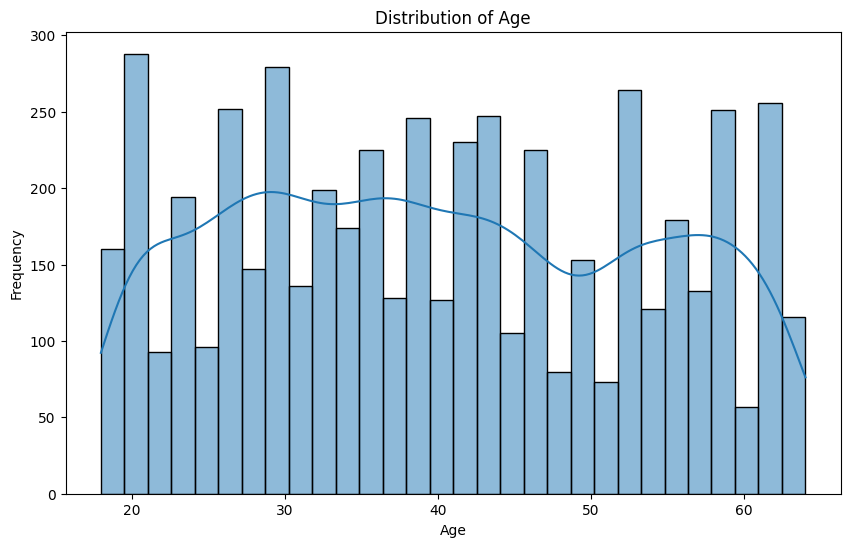

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Distribution of 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Gender Distribution**

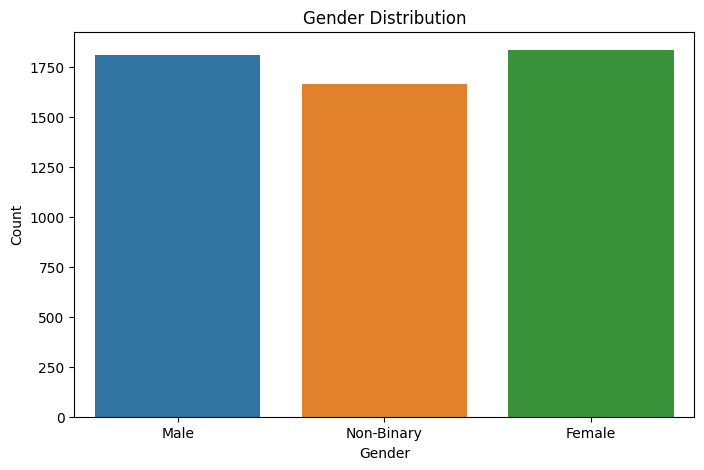

In [15]:
# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Device Type Distribution**

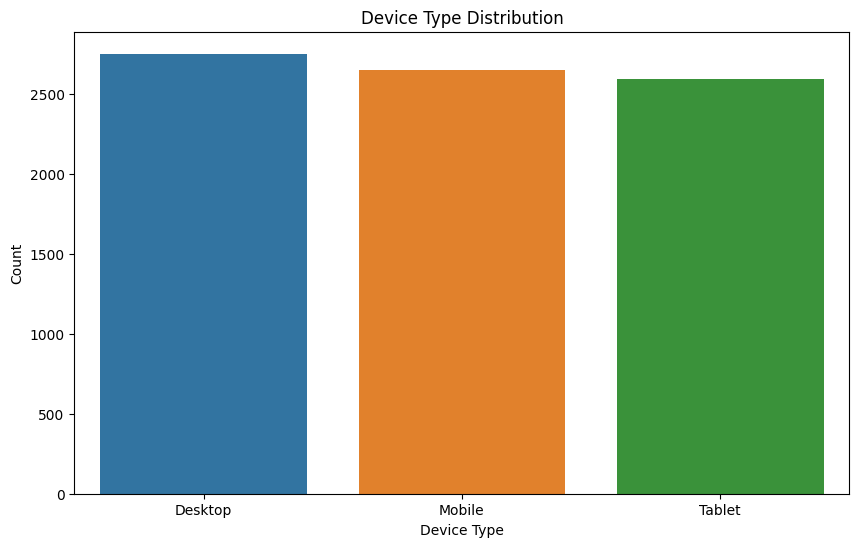

In [16]:
# Device type distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='device_type', data=df)
plt.title('Device Type Distribution')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()

**Ad Clicks by Time of Day**

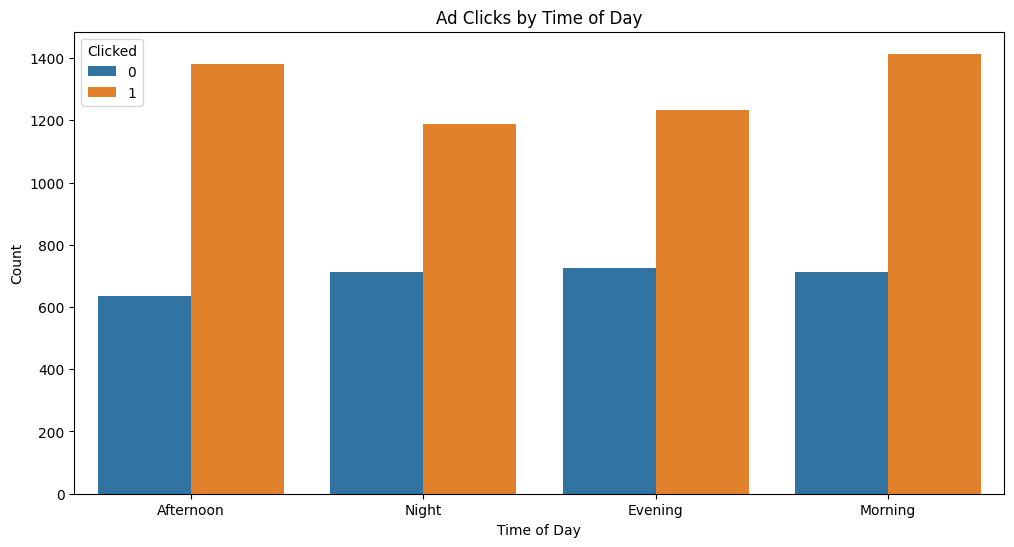

In [17]:
# Ad clicks by time of day
plt.figure(figsize=(12, 6))
sns.countplot(x='time_of_day', hue='click', data=df)
plt.title('Ad Clicks by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Clicked')
plt.show()

**Ad Position vs Clicks**

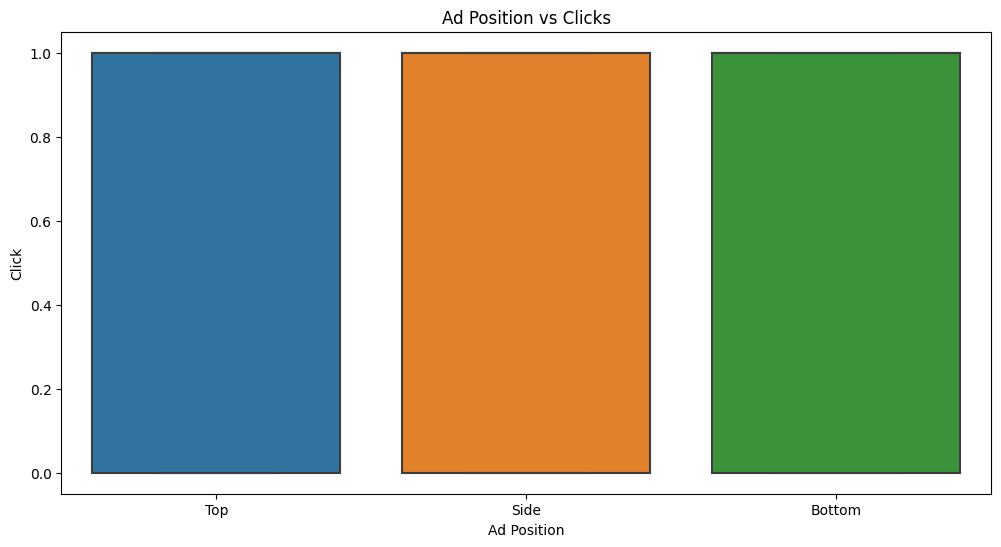

In [18]:
# Ad position vs clicks
plt.figure(figsize=(12, 6))
sns.boxplot(x='ad_position', y='click', data=df)
plt.title('Ad Position vs Clicks')
plt.xlabel('Ad Position')
plt.ylabel('Click')
plt.show()

**Correlation Matrix (for numeric columns)**

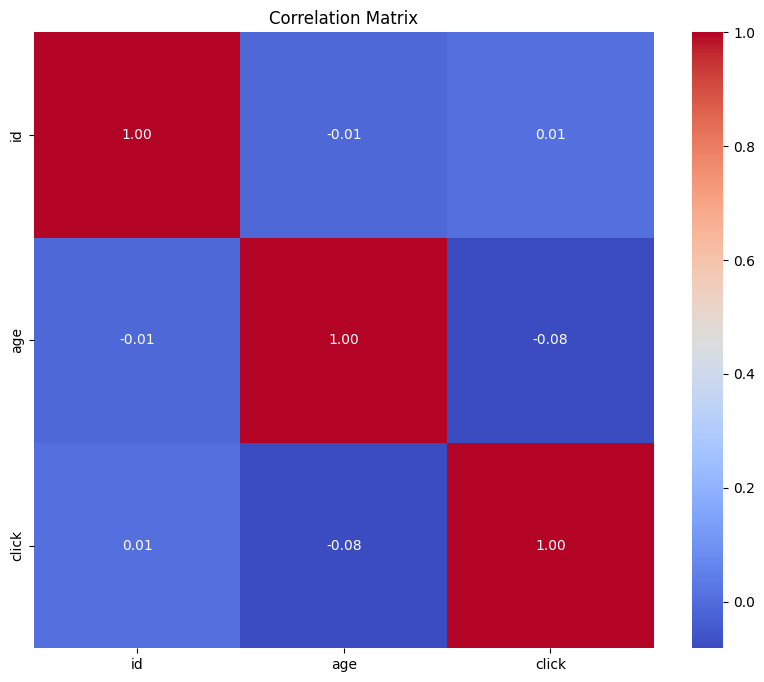

In [19]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Visualization of Clicks Based on Ad Position**

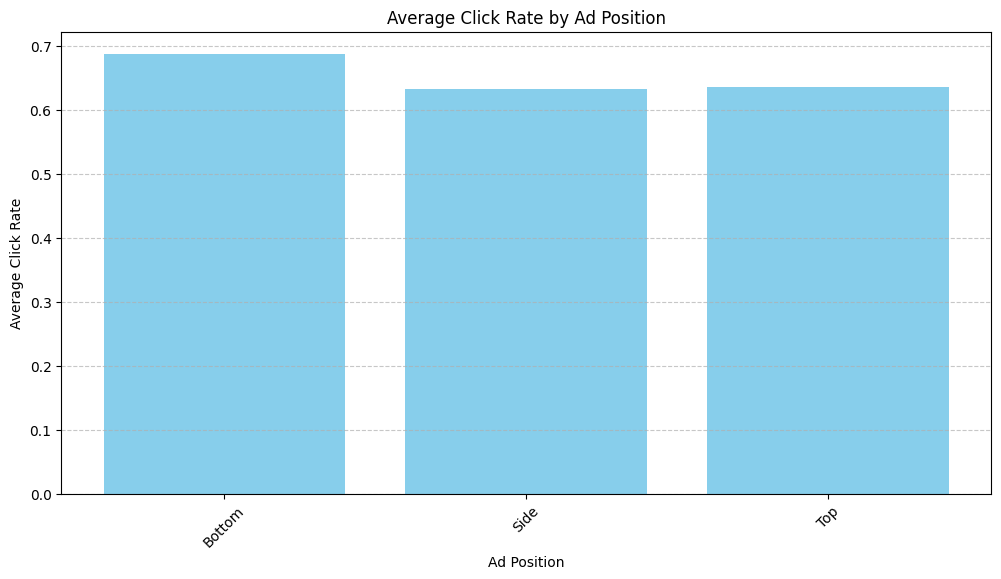

In [20]:
# Count of clicks by ad position
plt.figure(figsize=(12, 6))
ad_position_clicks = df.groupby('ad_position')['click'].mean().reset_index()
plt.bar(ad_position_clicks['ad_position'], ad_position_clicks['click'], color='skyblue')
plt.title('Average Click Rate by Ad Position')
plt.xlabel('Ad Position')
plt.ylabel('Average Click Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Age Distribution for Clicked and Non-Clicked Ads**

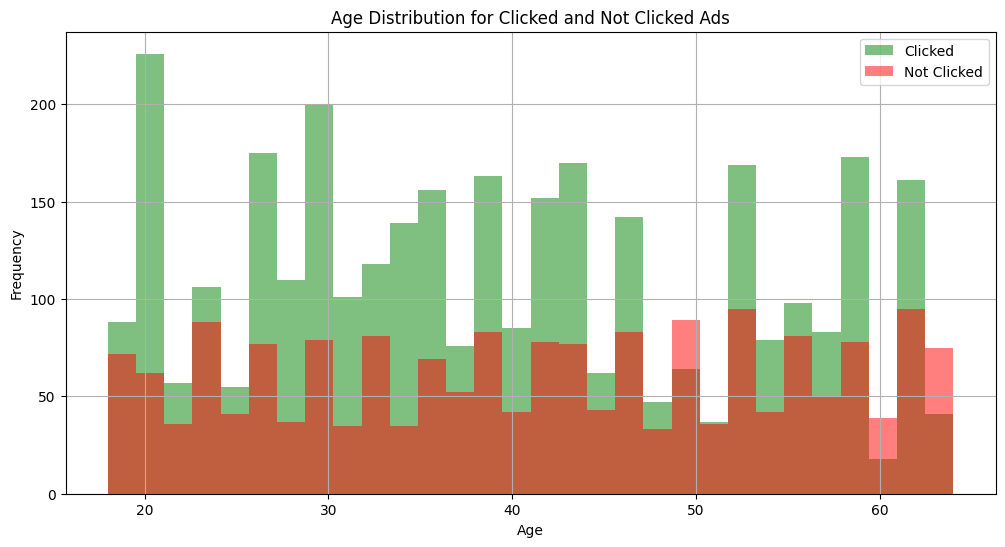

In [21]:
# Age distribution for clicked vs not clicked
plt.figure(figsize=(12, 6))
plt.hist(df[df['click'] == 1]['age'].dropna(), bins=30, alpha=0.5, label='Clicked', color='green')
plt.hist(df[df['click'] == 0]['age'].dropna(), bins=30, alpha=0.5, label='Not Clicked', color='red')
plt.title('Age Distribution for Clicked and Not Clicked Ads')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**Clicks by Device Type**

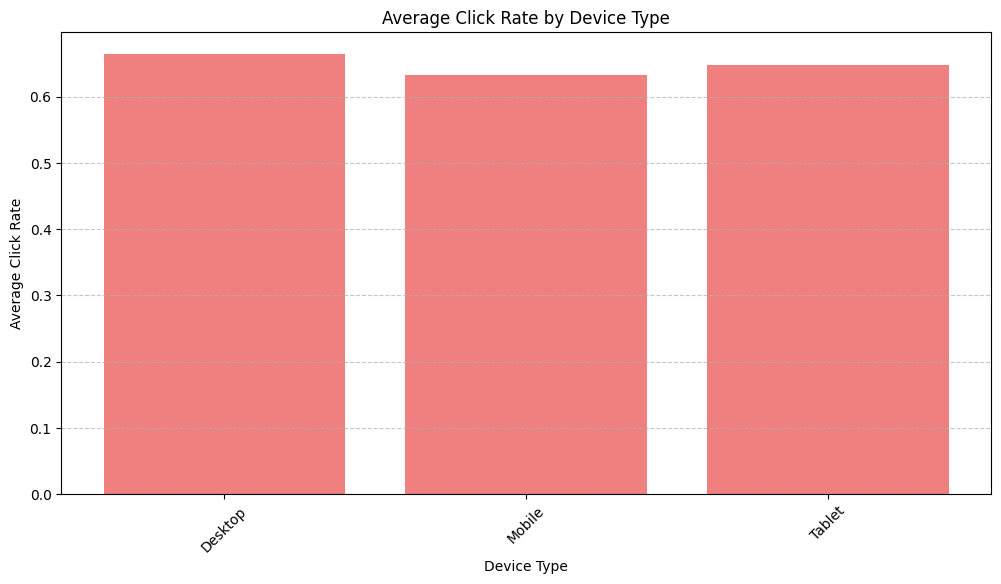

In [22]:
# Bar plot for clicks by device type
plt.figure(figsize=(12, 6))
device_clicks = df.groupby('device_type')['click'].mean().reset_index()
plt.bar(device_clicks['device_type'], device_clicks['click'], color='lightcoral')
plt.title('Average Click Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Average Click Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Clicks Distribution Across Different Times of Day**

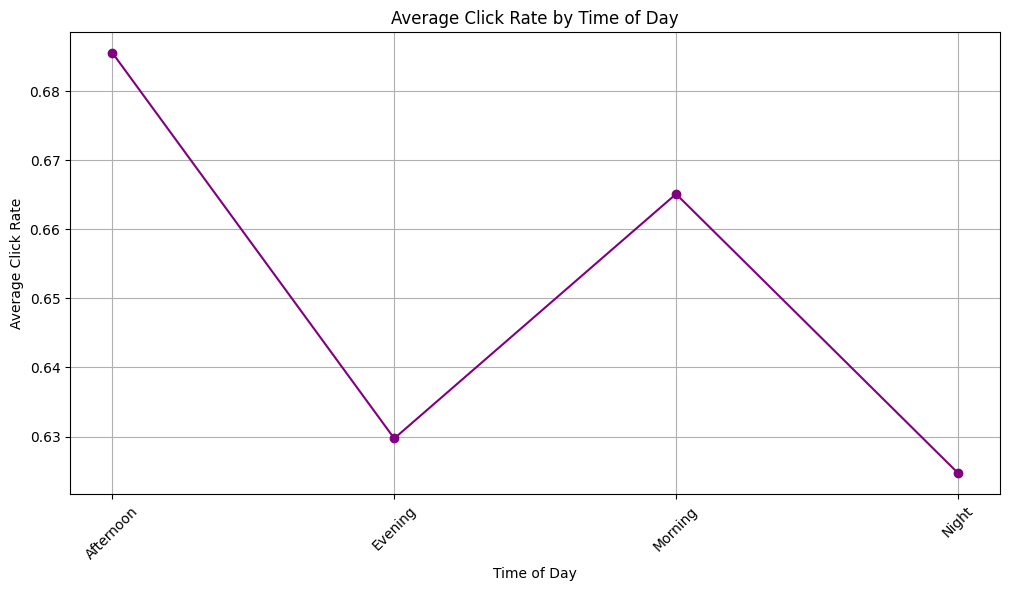

In [23]:
# Clicks distribution by time of day
plt.figure(figsize=(12, 6))
time_clicks = df.groupby('time_of_day')['click'].mean().reset_index()
plt.plot(time_clicks['time_of_day'], time_clicks['click'], marker='o', linestyle='-', color='purple')
plt.title('Average Click Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Click Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Time of Day Distribution of Clicks**

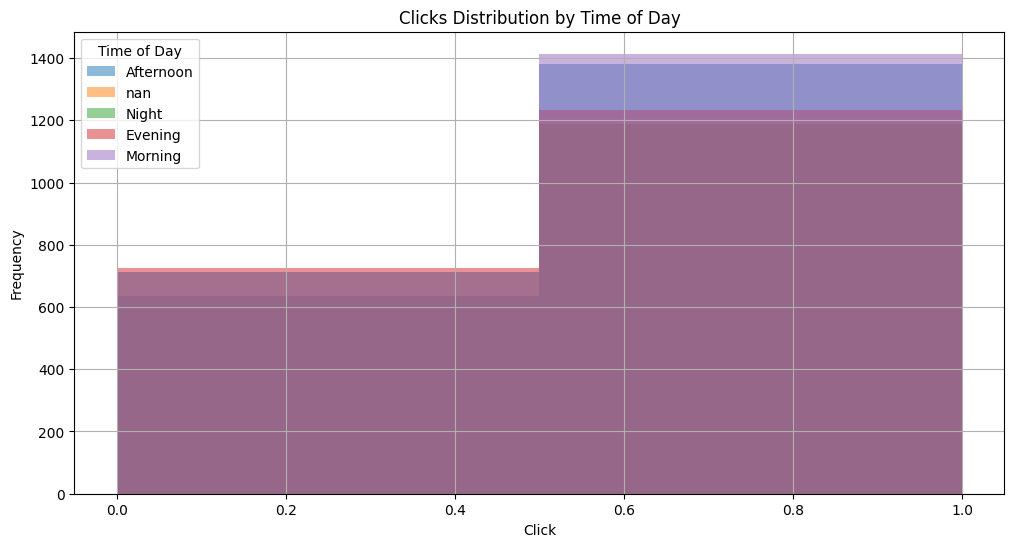

In [24]:
# Histogram of clicks distribution by time of day
plt.figure(figsize=(12, 6))
for time in df['time_of_day'].unique():
    subset = df[df['time_of_day'] == time]
    plt.hist(subset['click'], bins=2, alpha=0.5, label=f'{time}')
plt.title('Clicks Distribution by Time of Day')
plt.xlabel('Click')
plt.ylabel('Frequency')
plt.legend(title='Time of Day')
plt.grid(True)
plt.show()

**Age Distribution by Gender**

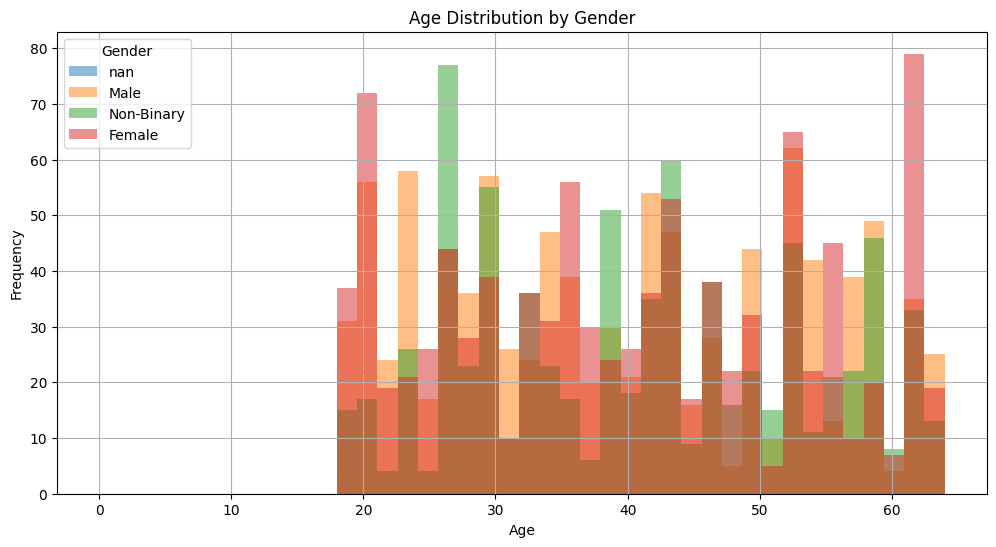

In [25]:
# Age distribution by gender
plt.figure(figsize=(12, 6))
for gender in df['gender'].unique():
    subset = df[df['gender'] == gender]
    plt.hist(subset['age'].dropna(), bins=30, alpha=0.5, label=gender)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

**Gender vs Clicks**

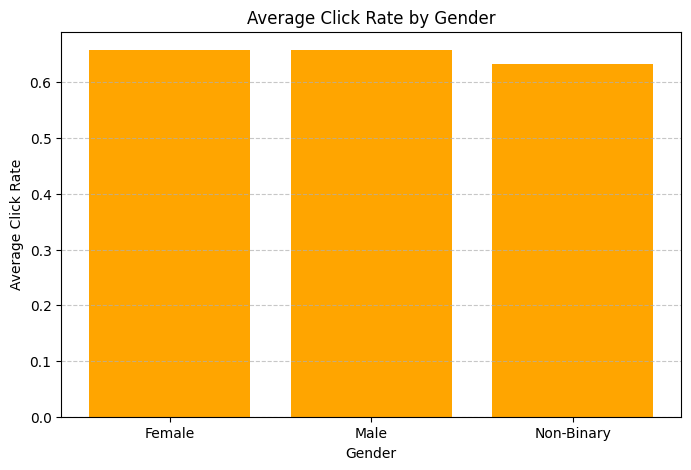

In [26]:
# Clicks distribution by gender
plt.figure(figsize=(8, 5))
gender_clicks = df.groupby('gender')['click'].mean().reset_index()
plt.bar(gender_clicks['gender'], gender_clicks['click'], color='orange')
plt.title('Average Click Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Click Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Distribution of Browsing History Length**

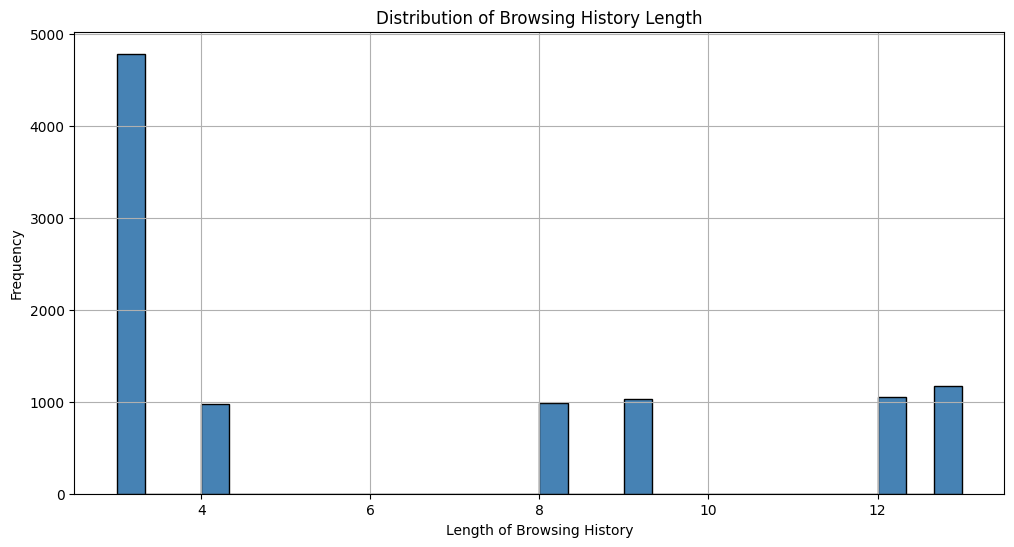

In [27]:
# Add a column for the length of browsing history
df['browsing_history_length'] = df['browsing_history'].apply(lambda x: len(str(x)))

# Histogram of browsing history lengths
plt.figure(figsize=(12, 6))
plt.hist(df['browsing_history_length'], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of Browsing History Length')
plt.xlabel('Length of Browsing History')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Browsing History Length by Clicks**

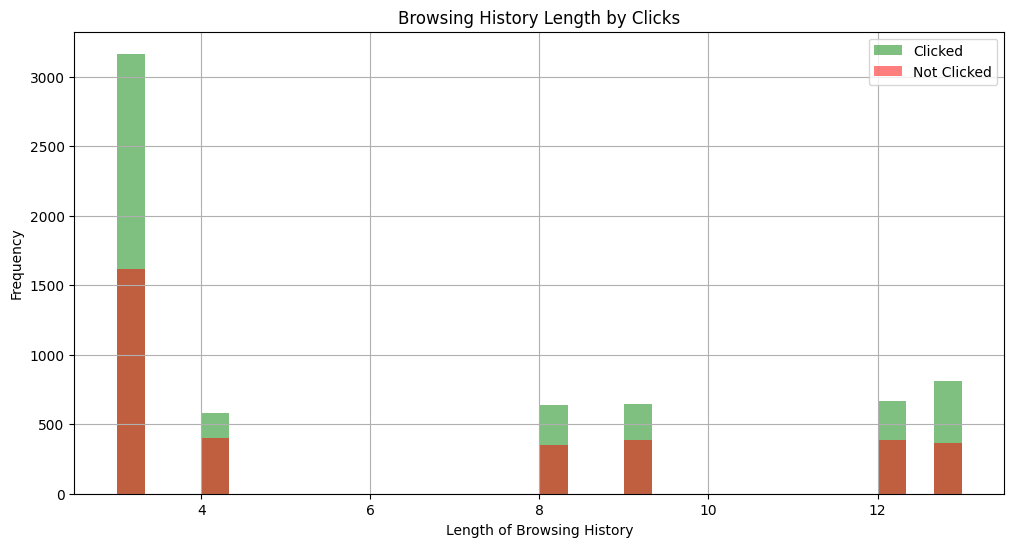

In [28]:
# Histogram of browsing history lengths by click
plt.figure(figsize=(12, 6))
plt.hist(df[df['click'] == 1]['browsing_history_length'], bins=30, alpha=0.5, label='Clicked', color='green')
plt.hist(df[df['click'] == 0]['browsing_history_length'], bins=30, alpha=0.5, label='Not Clicked', color='red')
plt.title('Browsing History Length by Clicks')
plt.xlabel('Length of Browsing History')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**Scatter Plot of Age vs Browsing History Length**

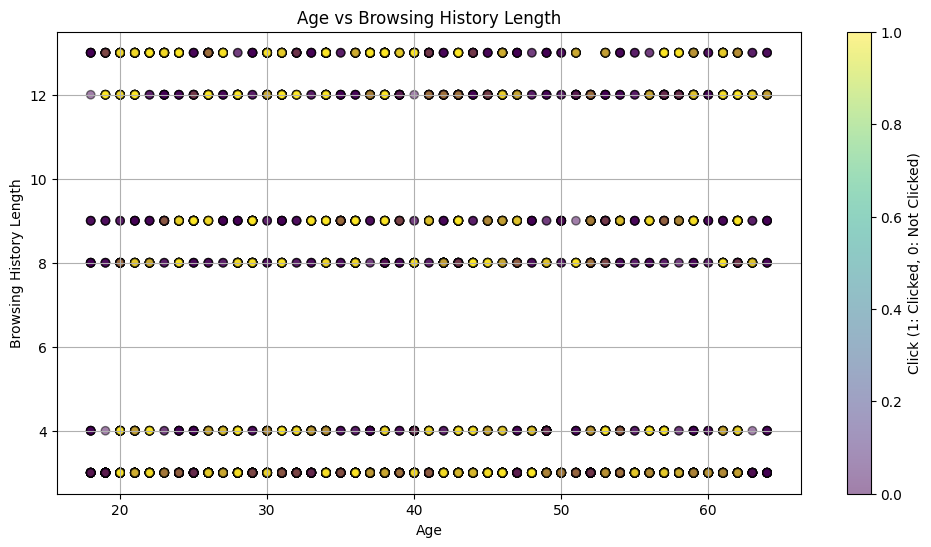

In [29]:
# Scatter plot of age vs browsing history length
plt.figure(figsize=(12, 6))
plt.scatter(df['age'], df['browsing_history_length'], alpha=0.5, c=df['click'], cmap='viridis', edgecolor='k')
plt.title('Age vs Browsing History Length')
plt.xlabel('Age')
plt.ylabel('Browsing History Length')
plt.colorbar(label='Click (1: Clicked, 0: Not Clicked)')
plt.grid(True)
plt.show()

**Clicks vs Age by Device Type**

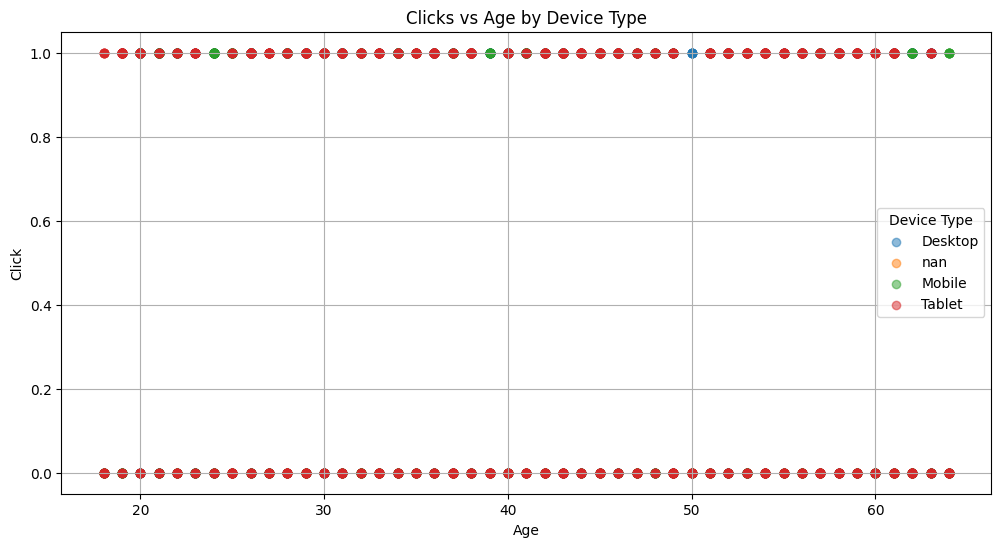

In [30]:
# Scatter plot of clicks vs age by device type
plt.figure(figsize=(12, 6))
for device in df['device_type'].unique():
    subset = df[df['device_type'] == device]
    plt.scatter(subset['age'], subset['click'], alpha=0.5, label=device)

plt.title('Clicks vs Age by Device Type')
plt.xlabel('Age')
plt.ylabel('Click')
plt.legend(title='Device Type')
plt.grid(True)
plt.show()

**Clicks Over Time of Day**

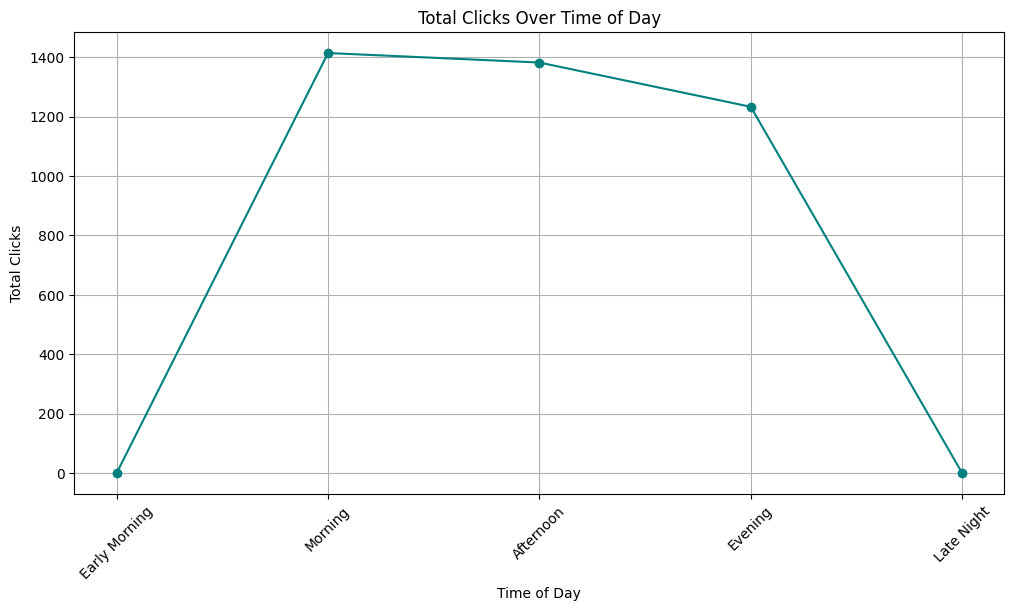

In [31]:
# Convert 'time_of_day' to categorical and sort
df['time_of_day'] = pd.Categorical(df['time_of_day'], categories=[
    'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Night'], ordered=True)

# Aggregate clicks over time of day
time_clicks = df.groupby('time_of_day')['click'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(time_clicks['time_of_day'], time_clicks['click'], marker='o', linestyle='-', color='teal')
plt.title('Total Clicks Over Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Clicks')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Clicks by Age Groups**

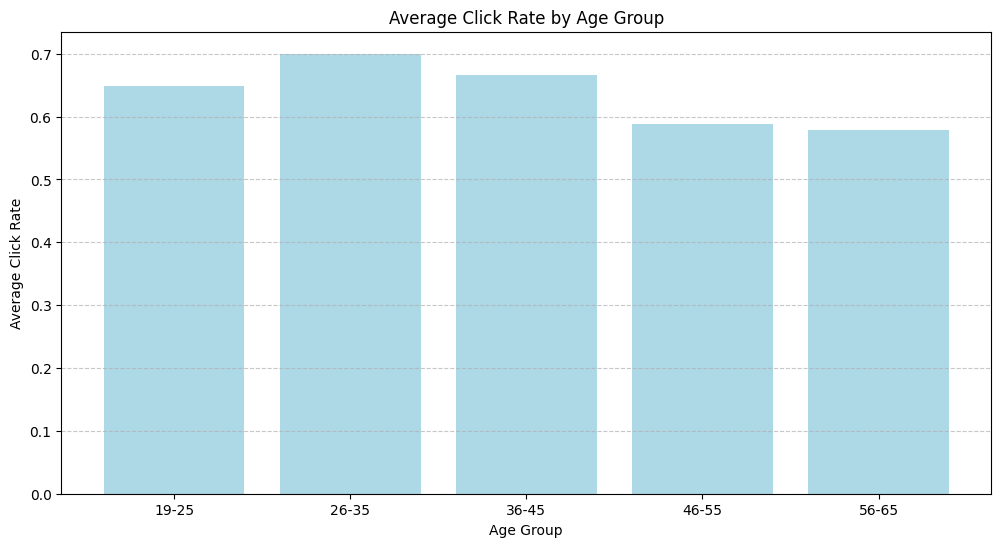

In [32]:
# Define age bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Create age group column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Clicks distribution by age group
plt.figure(figsize=(12, 6))
age_group_clicks = df.groupby('age_group')['click'].mean().reset_index()
plt.bar(age_group_clicks['age_group'], age_group_clicks['click'], color='lightblue')
plt.title('Average Click Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Click Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Clicks Distribution by Device Type and Gender**

<Figure size 1200x600 with 0 Axes>

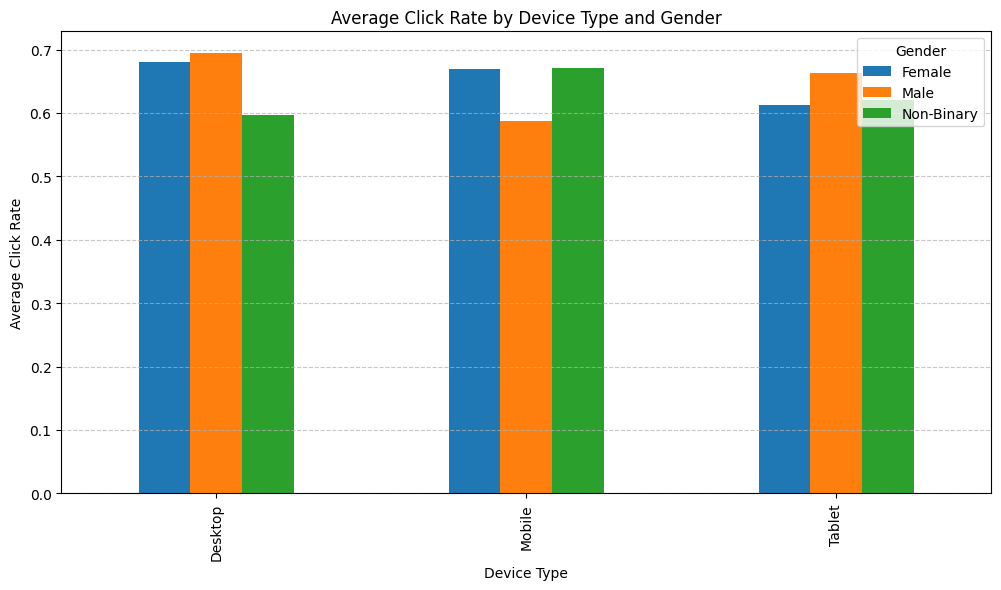

In [33]:
# Bar plot for clicks distribution by device type and gender
plt.figure(figsize=(12, 6))
device_gender_clicks = df.groupby(['device_type', 'gender'])['click'].mean().unstack()
device_gender_clicks.plot(kind='bar', figsize=(12, 6))
plt.title('Average Click Rate by Device Type and Gender')
plt.xlabel('Device Type')
plt.ylabel('Average Click Rate')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Heatmap of Clicks by Ad Position and Time of Day**

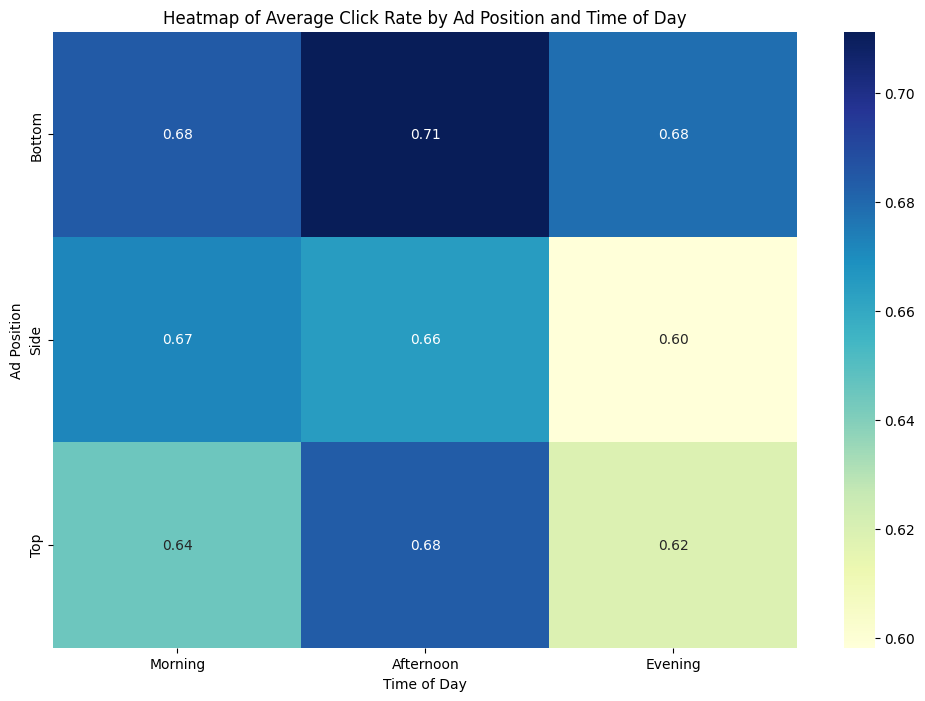

In [34]:
import seaborn as sns

# Pivot table for heatmap
heatmap_data = df.pivot_table(index='ad_position', columns='time_of_day', values='click', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Average Click Rate by Ad Position and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Ad Position')
plt.show()

**Line Plot of Clicks Over Time of Day for Different Ad Positions**

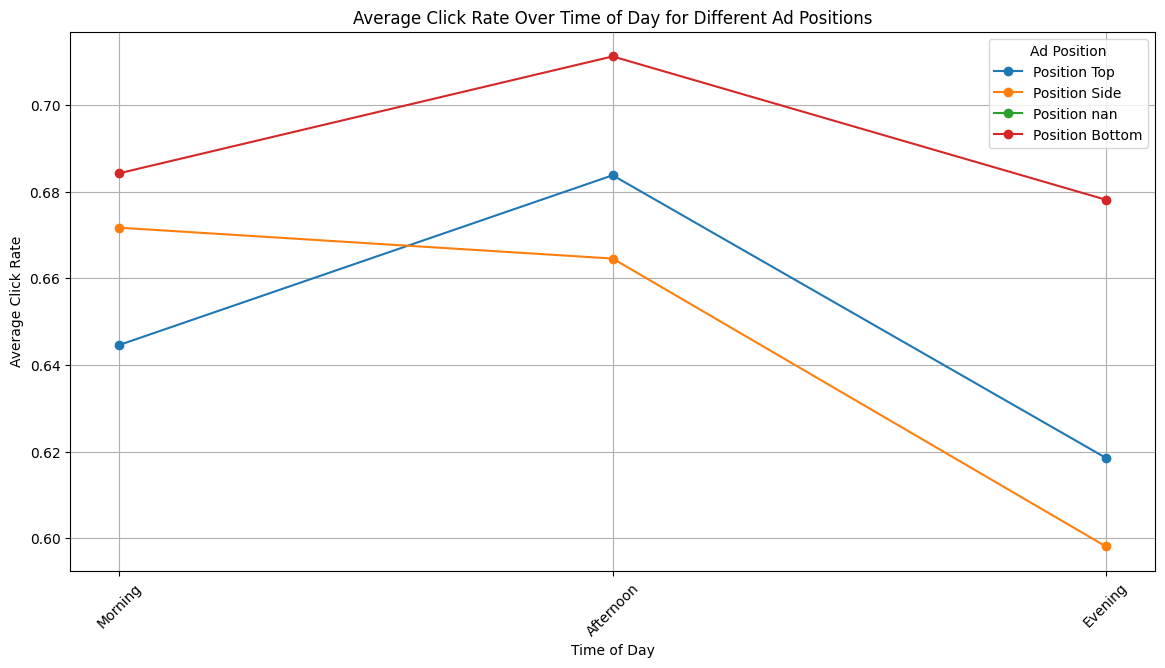

In [35]:
# Line plot of clicks over time of day for different ad positions
plt.figure(figsize=(14, 7))
for position in df['ad_position'].unique():
    subset = df[df['ad_position'] == position]
    clicks_by_time = subset.groupby('time_of_day')['click'].mean().reset_index()
    plt.plot(clicks_by_time['time_of_day'], clicks_by_time['click'], marker='o', label=f'Position {position}')

plt.title('Average Click Rate Over Time of Day for Different Ad Positions')
plt.xlabel('Time of Day')
plt.ylabel('Average Click Rate')
plt.legend(title='Ad Position')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Heatmap of Average Click Rate by Gender and Age Group**

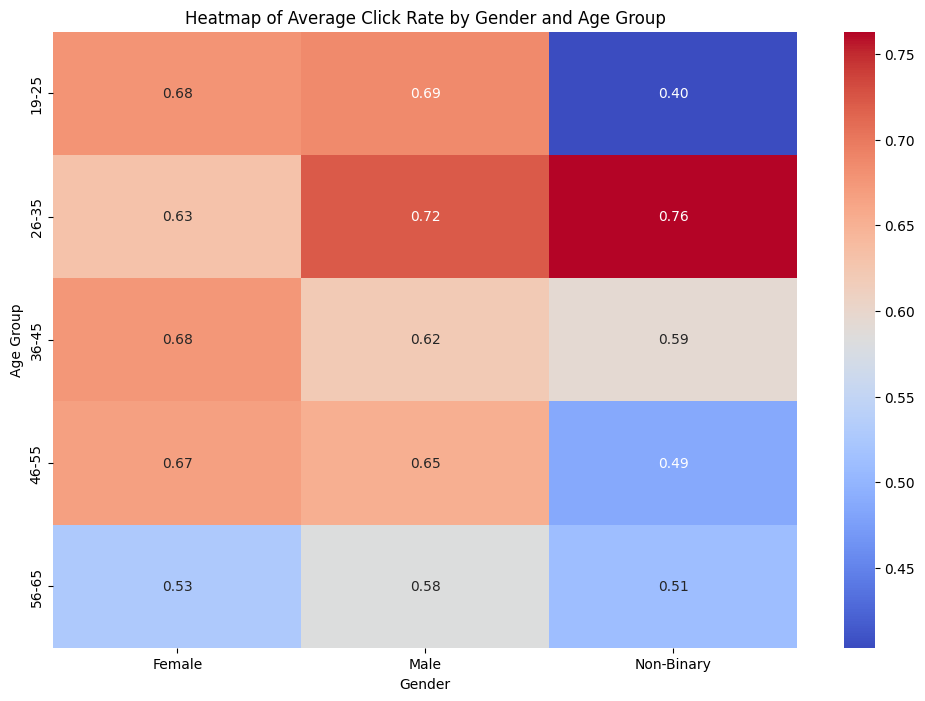

In [36]:
# Pivot table for heatmap
heatmap_data_gender_age = df.pivot_table(index='age_group', columns='gender', values='click', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_gender_age, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Average Click Rate by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()

**Histogram of Browsing History Length by Ad Position**

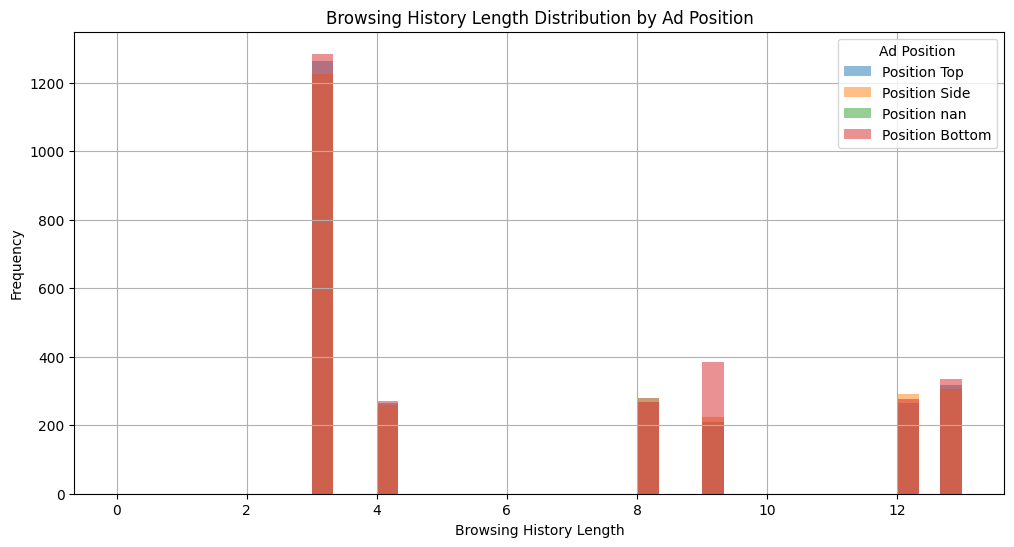

In [37]:
# Histogram of browsing history lengths by ad position
plt.figure(figsize=(12, 6))
for pos in df['ad_position'].unique():
    subset = df[df['ad_position'] == pos]
    plt.hist(subset['browsing_history_length'], bins=30, alpha=0.5, label=f'Position {pos}')

plt.title('Browsing History Length Distribution by Ad Position')
plt.xlabel('Browsing History Length')
plt.ylabel('Frequency')
plt.legend(title='Ad Position')
plt.grid(True)
plt.show()

**Age Distribution by Device Type**

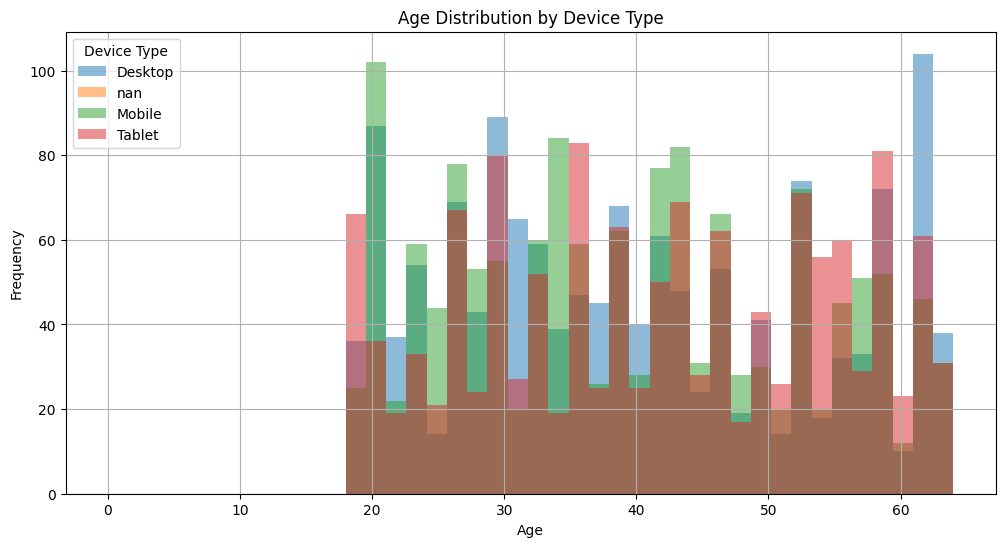

In [38]:
# Age distribution by device type
plt.figure(figsize=(12, 6))
for device in df['device_type'].unique():
    subset = df[df['device_type'] == device]
    plt.hist(subset['age'].dropna(), bins=30, alpha=0.5, label=device)

plt.title('Age Distribution by Device Type')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Device Type')
plt.grid(True)
plt.show()